In [1]:
import pandas as pd
from scipy.stats import norm
import math
import numpy as np
import matplotlib.pyplot as plt
import itertools
"""Создаем функцию, которая считает цену опциона"""
def option_price_share(price, strike, IV, time, put=False):
    ln=math.log(price/strike)
    denom=IV*math.sqrt(time)
    d1=(((IV**2)/2)*time+ln)/denom
    d2=d1-denom
    
    Nd1=norm.cdf(d1, loc=0, scale=1)
    Nd2=norm.cdf(d2, loc=0, scale=1)
    Nd_1=norm.cdf(-d1, loc=0, scale=1)
    Nd_2=norm.cdf(-d2, loc=0, scale=1)
    option=price*Nd1-strike*Nd2
    if put:
        option=strike*Nd_2-price*Nd_1
    return option

In [2]:
"""Создаем функцию, которая считает цену опциона при различных сценариях
basic_std - ст.откл. цены базового актива
delta_std - ст. откл. изменения IV"""
def option_change(price, strike, IV, time, basic_std, delta_std, put=False):
    price_vector=[0,0,1/3*basic_std,1/3*basic_std,-1/3*basic_std,-1/3*basic_std,
                 2/3*basic_std,2/3*basic_std,-2/3*basic_std,-2/3*basic_std,basic_std,
                 basic_std,-basic_std,-basic_std,2*basic_std,-2*basic_std]
    volatility_vector=[delta_std,-delta_std,delta_std,-delta_std,delta_std,-delta_std,delta_std,-delta_std,
                      delta_std,-delta_std,delta_std,-delta_std,delta_std,-delta_std,0,0]
    PL=[]
    basic_prices=[]
    contract_prices=[]
    if put:
        price0=option_price_share(price, strike, IV, time, put=True)
        for i in range(0,len(price_vector)):
            price_new=option_price_share(price*(1+price_vector[i]), strike, IV+volatility_vector[i], time, put=True)
            basic_prices.append(price*(1+price_vector[i]))
            contract_prices.append(price_new)
            PL.append(price_new-price0)

        PL[-1]=PL[-1]*0.35
        PL[-2]=PL[-2]*0.35

    else:
        price0=option_price_share(price, strike, IV, time, put=False)
        for i in range(0,len(price_vector)):
            price_new=option_price_share(price*(1+price_vector[i]), strike, IV*(1+volatility_vector[i]), time, put=False)
            basic_prices.append(price*(1+price_vector[i]))
            contract_prices.append(price_new)
            PL.append(price_new-price0)

        PL[-1]=PL[-1]*0.35
        PL[-2]=PL[-2]*0.35
    return PL, basic_prices, contract_prices

In [3]:
std0=0.02
std_list=[]
day=[]
for i in range(1,30):
    day.append(i)
    stdi=std0*math.sqrt(i)
    std_list.append(stdi*100)

In [4]:
0.02*math.sqrt(14)*9

0.6734983296193096

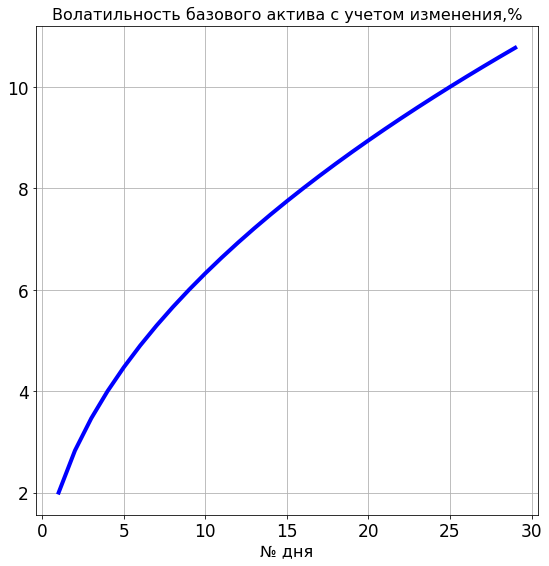

In [5]:
plt.figure(figsize=(9,9))
plt.plot(day, std_list,color='blue',linewidth=4, label='Volatility')
plt.title('Волатильность базового актива с учетом изменения,%',fontsize=16)
plt.tick_params(labelsize=17)
plt.xlabel('№ дня',fontsize=16)
plt.grid()
#plt.show()
plt.savefig('volatility_change.png', dpi = 1000,transparent=True)

In [6]:

option_strike=105
IV=0.25
price=100
scan_risk_std_method=[]
basic_prices_std_method=[]

delta_std=0.05
for i in range(1,30):
    std=0.02*math.sqrt(i)
    option_time=(365-i)/365
    results_std_method=option_change(price, option_strike, IV, option_time, 3*std, delta_std, put=False)
    scan=min(results_std_method[0])
    scan_risk_std_method.append(scan)
    basic_prices_std_method.append(results_std_method[1][results_std_method[0].index(scan)])

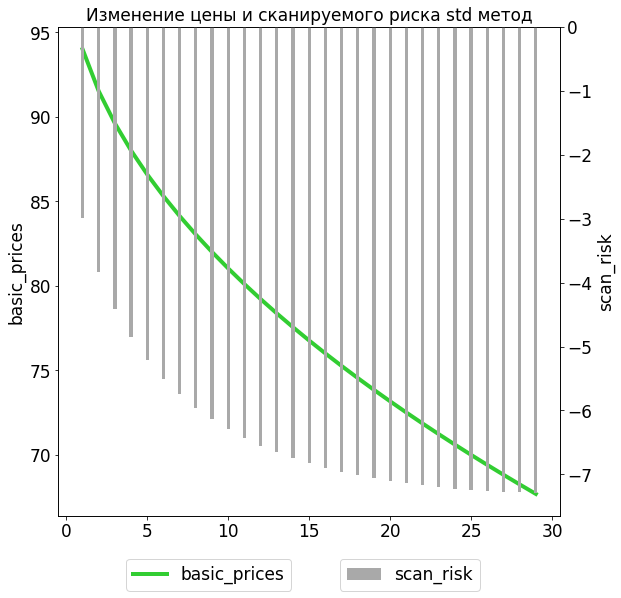

In [31]:

fig, ax1 = plt.subplots()

plt.title('Изменение цены и сканируемого риска std метод',fontsize=17)
ax2 = ax1.twinx()
fig.set_figheight(9)
fig.set_figwidth(9)
ax1.plot(day, basic_prices_std_method, label= 'basic_prices',color='limegreen',linewidth=4)
ax2.bar(day, scan_risk_std_method, label = 'scan_risk', color='darkgrey',width=0.2)
ax1.set_ylabel('basic_prices',fontsize=17)
ax1.tick_params(labelsize=17)
ax2.set_ylabel('scan_risk',fontsize=17)
ax2.tick_params(labelsize=17)
ax1.legend(loc='center', bbox_to_anchor=(0.3, -0.12), shadow=False, ncol=2, fontsize=17)
ax2.legend(loc='center', bbox_to_anchor=(0.7, -0.12), shadow=False, ncol=2,fontsize=17)
#plt.show()
plt.savefig('std_method.png', dpi = 1000,transparent=True)

In [32]:
scan_risk_std_method

[-2.984316920830043,
 -3.8340462211759814,
 -4.414706980194524,
 -4.856740196505385,
 -5.210808852104773,
 -5.502967833380687,
 -5.748737915714811,
 -5.958259294813288,
 -6.138593670545031,
 -6.294894927434333,
 -6.431062043269385,
 -6.550129439958155,
 -6.654513411004009,
 -6.746174664014985,
 -6.826729479561412,
 -6.89752807263011,
 -6.959711281397931,
 -7.014252503817789,
 -7.061989331898537,
 -7.103647828242571,
 -7.139861442914356,
 -7.171185956919075,
 -7.1981114333155665,
 -7.221071882618743,
 -7.240453159710656,
 -7.256599476347496,
 -7.269818818270498,
 -7.2803874870226934,
 -7.288553935960426]

In [33]:
diff_scan = []
for x, y in zip(scan_risk_std_method[0::], scan_risk_std_method[1::]):
    diff_scan.append(y-x)

diff_scan

[-0.8497293003459383,
 -0.5806607590185422,
 -0.4420332163108611,
 -0.35406865559938794,
 -0.29215898127591444,
 -0.24577008233412379,
 -0.20952137909847757,
 -0.18033437573174282,
 -0.15630125688930185,
 -0.13616711583505214,
 -0.11906739668877009,
 -0.10438397104585384,
 -0.09166125301097594,
 -0.08055481554642707,
 -0.07079859306869807,
 -0.06218320876782091,
 -0.05454122241985804,
 -0.04773682808074753,
 -0.04165849634403429,
 -0.03621361467178463,
 -0.03132451400471936,
 -0.026925476396491455,
 -0.02296044930317631,
 -0.019381277091913063,
 -0.016146316636840297,
 -0.013219341923002226,
 -0.010568668752195087,
 -0.00816644893773244]

In [34]:
margin=[scan_risk_std_method[0]]

In [35]:
margin=margin+diff_scan

In [36]:
margin

[-2.984316920830043,
 -0.8497293003459383,
 -0.5806607590185422,
 -0.4420332163108611,
 -0.35406865559938794,
 -0.29215898127591444,
 -0.24577008233412379,
 -0.20952137909847757,
 -0.18033437573174282,
 -0.15630125688930185,
 -0.13616711583505214,
 -0.11906739668877009,
 -0.10438397104585384,
 -0.09166125301097594,
 -0.08055481554642707,
 -0.07079859306869807,
 -0.06218320876782091,
 -0.05454122241985804,
 -0.04773682808074753,
 -0.04165849634403429,
 -0.03621361467178463,
 -0.03132451400471936,
 -0.026925476396491455,
 -0.02296044930317631,
 -0.019381277091913063,
 -0.016146316636840297,
 -0.013219341923002226,
 -0.010568668752195087,
 -0.00816644893773244]

In [37]:
"""Создаем функцию, которая считает цену опциона при различных сценариях для второго подхода дерева
basic_std - ст.откл. цены базового актива
delta_std - ст. откл. изменения IV"""
def option_change_two(price, price_change, strike, IV, time, basic_std, delta_std, put=False):
    price_vector=[0,0,1/3*basic_std,1/3*basic_std,-1/3*basic_std,-1/3*basic_std,
                 2/3*basic_std,2/3*basic_std,-2/3*basic_std,-2/3*basic_std,basic_std,
                 basic_std,-basic_std,-basic_std,2*basic_std,-2*basic_std]
    volatility_vector=[delta_std,-delta_std,delta_std,-delta_std,delta_std,-delta_std,delta_std,-delta_std,
                      delta_std,-delta_std,delta_std,-delta_std,delta_std,-delta_std,0,0]
    PL=[]
    basic_prices=[]
    contract_prices=[]
    if put:
        price0=option_price_share(price, strike, IV, time, put=True)
        for i in range(0,len(price_vector)):
            price_new=option_price_share(price_change*(1+price_vector[i]), strike, IV+volatility_vector[i], time, put=True)
            basic_prices.append(price_change*(1+price_vector[i]))
            contract_prices.append(price_new)
            PL.append(price_new-price0)

        PL[-1]=PL[-1]*0.35
        PL[-2]=PL[-2]*0.35

    else:
        price0=option_price_share(price, strike, IV, time, put=False)
        for i in range(0,len(price_vector)):
            price_new=option_price_share(price_change*(1+price_vector[i]), strike, IV*(1+volatility_vector[i]), time, put=False)
            basic_prices.append(price_change*(1+price_vector[i]))
            contract_prices.append(price_new)
            PL.append(price_new-price0)

        PL[-1]=PL[-1]*0.35
        PL[-2]=PL[-2]*0.35
    return PL, basic_prices, contract_prices

In [38]:
option_strike=105
IV=0.25
price=100
price_change=100
scan_risk_tree=[]
basic_prices_tree=[]
std=0.02
delta_std=0.05
for i in range(0,30):
    option_time=(365-i)/365
    results_tree=option_change_two(price,price_change, option_strike, IV, option_time, std, delta_std, put=False)
    scan=min(results_tree[0])
    scan_risk_tree.append(scan)
    basic_prices_tree.append(results_tree[1][results_tree[0].index(scan)])
    price_change=basic_prices_tree[i]

In [39]:
len(basic_prices_tree)

30

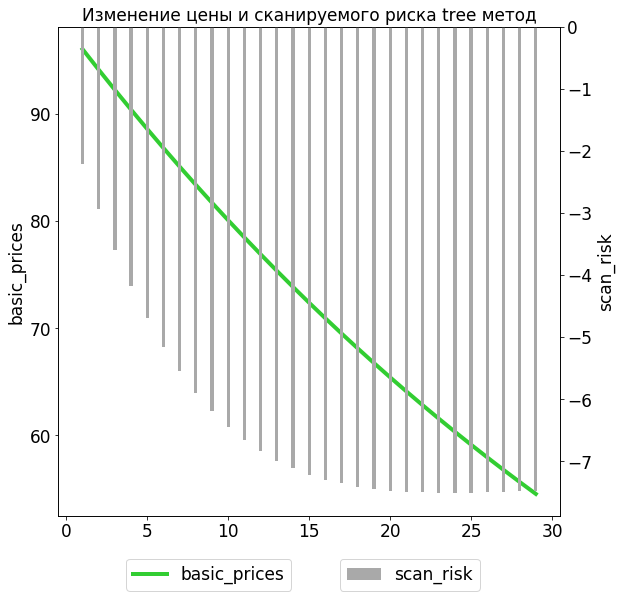

In [47]:
fig, ax1 = plt.subplots()
plt.title('Изменение цены и сканируемого риска tree метод',fontsize=17)
ax2 = ax1.twinx()
fig.set_figheight(9)
fig.set_figwidth(9)
ax1.plot(day, basic_prices_tree[1:30], label= 'basic_prices',color='limegreen',linewidth=4)
ax2.bar(day, scan_risk_tree[1:30], label = 'scan_risk', color='darkgrey',width=0.2)
ax1.set_ylabel('basic_prices',fontsize=17)
ax1.tick_params(labelsize=17)
ax2.set_ylabel('scan_risk',fontsize=17)
ax2.tick_params(labelsize=17)
ax1.legend(loc='center', bbox_to_anchor=(0.3, -0.12), shadow=False, ncol=2, fontsize=17)
ax2.legend(loc='center', bbox_to_anchor=(0.7, -0.12), shadow=False, ncol=2,fontsize=17)
#plt.show()
plt.savefig('tree_method.png', dpi = 1000,transparent=True)



In [41]:
diff_scan_tree = []
for x, y in zip(scan_risk_tree[0::], scan_risk_tree[1::]):
    diff_scan_tree.append(y-x)

diff_scan_tree

[-0.8123124203182357,
 -0.7319146355579775,
 -0.6557422697675364,
 -0.5840405666457826,
 -0.5169945894841774,
 -0.45472674635151833,
 -0.397296195119619,
 -0.3447000854539244,
 -0.2968765174861723,
 -0.2537090282189851,
 -0.2150323604216826,
 -0.1806392275708868,
 -0.15028776388963205,
 -0.12370934119940014,
 -0.10061644344075482,
 -0.08071031364276582,
 -0.06368812428365267,
 -0.049249467263851265,
 -0.037102010652894535,
 -0.026966222482694313,
 -0.018579113857015273,
 -0.011697001679009666,
 -0.006097333091969581,
 -0.001579647699585962,
 0.002034221095592592,
 0.004900587914689503,
 0.0071548747620777675,
 0.008912961978283285,
 0.010272810862267612]

In [42]:
margin_tree=[scan_risk_tree[0]]

In [43]:
margin_tree=margin_tree+diff_scan_tree

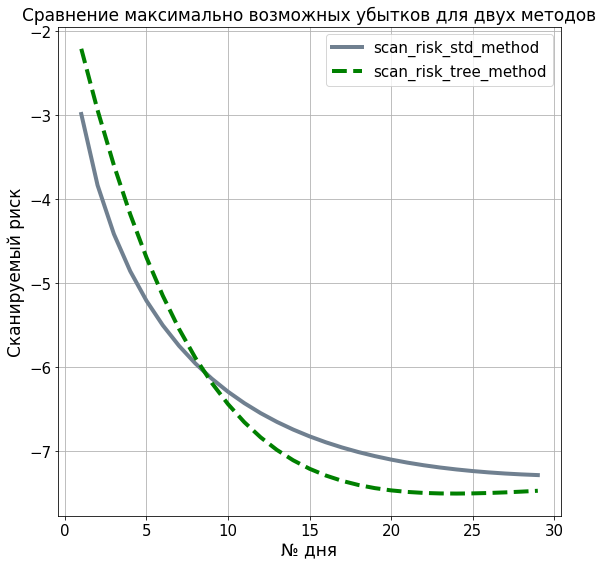

In [54]:
plt.figure(figsize=(9,9))

plt.plot(day, scan_risk_std_method,color='slategray',linewidth=4,label='scan_risk_std_method')
plt.plot(day, scan_risk_tree[1:30], '--',color='green',linewidth=4, label='scan_risk_tree_method')
plt.title('Сравнение максимально возможных убытков для двух методов',fontsize=17)
plt.legend(fontsize=15)
plt.tick_params(labelsize=15)
#plt.annotate('Strike',fontsize=15, xy=(15, 0),  xycoords='data',
            #xytext=(20, 0), textcoords='data',
            #arrowprops=dict(facecolor='green'))
plt.ylabel('Сканируемый риск',fontsize=17)
plt.xlabel('№ дня',fontsize=17)
plt.grid()

#plt.show()
plt.savefig('compare_method.png', dpi = 1000,transparent=True)

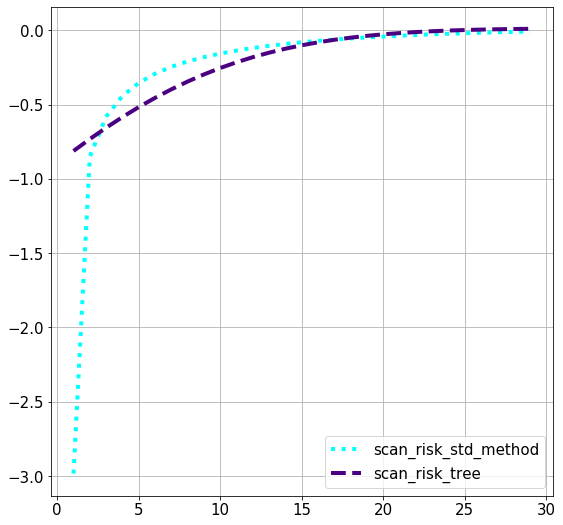

In [45]:
plt.figure(figsize=(9,9))

plt.plot(day, margin, ':',color='aqua',linewidth=4,label='scan_risk_std_method')
plt.plot(day, margin_tree[1:30], '--',color='indigo',linewidth=4, label='scan_risk_tree')
#plt.title('P&L портфеля: Long Call Option + Short Futures',fontsize=15)
plt.legend(fontsize=15)
plt.tick_params(labelsize=15)

plt.grid()

plt.show()